In [ ]:
!pip install tensorflow matplotlib numpy scikit-learn seaborn

In [ ]:
# Implement anomaly detection for given credit card dataset using Autoencoder and
# build the model by using the following steps:
# a. Import required libraries
# b. Upload / access the dataset
# c. Encoder converts it into latent representation
# d. Decoder networks convert it back to the original input
# e. Compile the models with Optimizer, Loss, and Evaluation Metrics

TensorFlow version: 2.20.0
STAGE A-B: LOADING AND PREPROCESSING CREDIT CARD DATASET
📁 Local file not found. Creating realistic synthetic dataset...
✅ Realistic synthetic dataset created successfully!
Dataset shape: (284807, 32)
Columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'Amount', 'Class']

📊 DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-nul

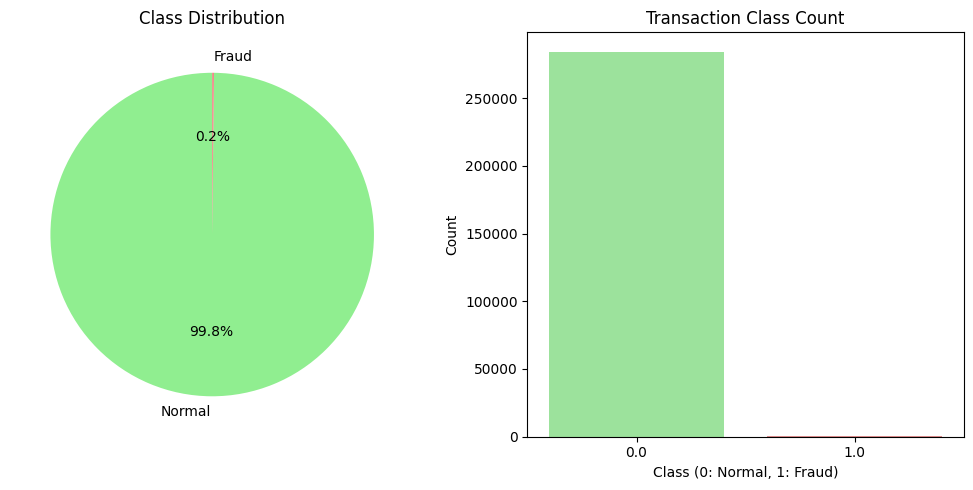


🔄 PREPROCESSING DATA...
Scaled data shape: (284807, 31)
Data range after scaling: [-11.896, 38.747]
Normal transactions: 284315
Fraudulent transactions: 492

📊 TRAINING/TESTING SPLIT:
Training data (normal only): (199020, 31)
Testing data: (85787, 31)
Testing labels - Normal: 85295, Fraud: 492

STAGE C-D: BUILDING AUTOENCODER ARCHITECTURE

🔧 AUTOENCODER ARCHITECTURE:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 31)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_1 (Dense)              │ (None, 28)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_bn_1 (BatchNormalization)    │ (None, 28)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dropout_1 (Dropout)          │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_2 (Dense)              │ (None, 14)                  │             406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_bn_2 (BatchNormalization)    │ (None, 14)                  │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dense_1 (Dense)              │ (None, 28)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_bn_1 (BatchNormalization)    │ (None, 28)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dropout_1 (Dropout)          │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Dense)               │ (None, 31)                  │             899 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,111 (12.15 KB)

 Trainable params: 2,971 (11.61 KB)

 Non-trainable params: 140 (560.00 B)


🔧 ENCODER ARCHITECTURE:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 31)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_1 (Dense)              │ (None, 28)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_bn_1 (BatchNormalization)    │ (None, 28)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dropout_1 (Dropout)          │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_2 (Dense)              │ (None, 14)                  │             406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_bn_2 (BatchNormalization)    │ (None, 14)                  │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 14)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,680 (6.56 KB)

 Trainable params: 1,596 (6.23 KB)

 Non-trainable params: 84 (336.00 B)


🔧 DECODER ARCHITECTURE:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dense_1_new (Dense)          │ (None, 28)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_bn_1_new                     │ (None, 28)                  │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dropout_1_new (Dropout)      │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output_new (Dense)           │ (None, 31)                  │             899 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,431 (5.59 KB)

 Trainable params: 1,375 (5.37 KB)

 Non-trainable params: 56 (224.00 B)


STAGE E: COMPILING AND TRAINING AUTOENCODER
✅ Autoencoder compiled successfully!
Optimizer: Adam (lr=0.001)
Loss: Mean Squared Error
Metrics: Mean Absolute Error

🚀 TRAINING AUTOENCODER...
Epoch 1/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9938 - mae: 0.7865 - val_loss: 0.7847 - val_mae: 0.7041
Epoch 2/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7725 - mae: 0.6980 - val_loss: 0.6507 - val_mae: 0.6408
Epoch 3/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6828 - mae: 0.6558 - val_loss: 0.6061 - val_mae: 0.6164
Epoch 4/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6595 - mae: 0.6436 - val_loss: 0.5760 - val_mae: 0.5987
Epoch 5/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6381 - mae: 0.6315 - val_loss: 0.5659 - val_mae: 0.5903
Epoch 6/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6339 - mae: 0.6276 - val_loss: 0.5577 - val_mae: 0.5820
Epoch 7/50
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6321 - mae: 0.6251 - val_loss: 0.5552 - 

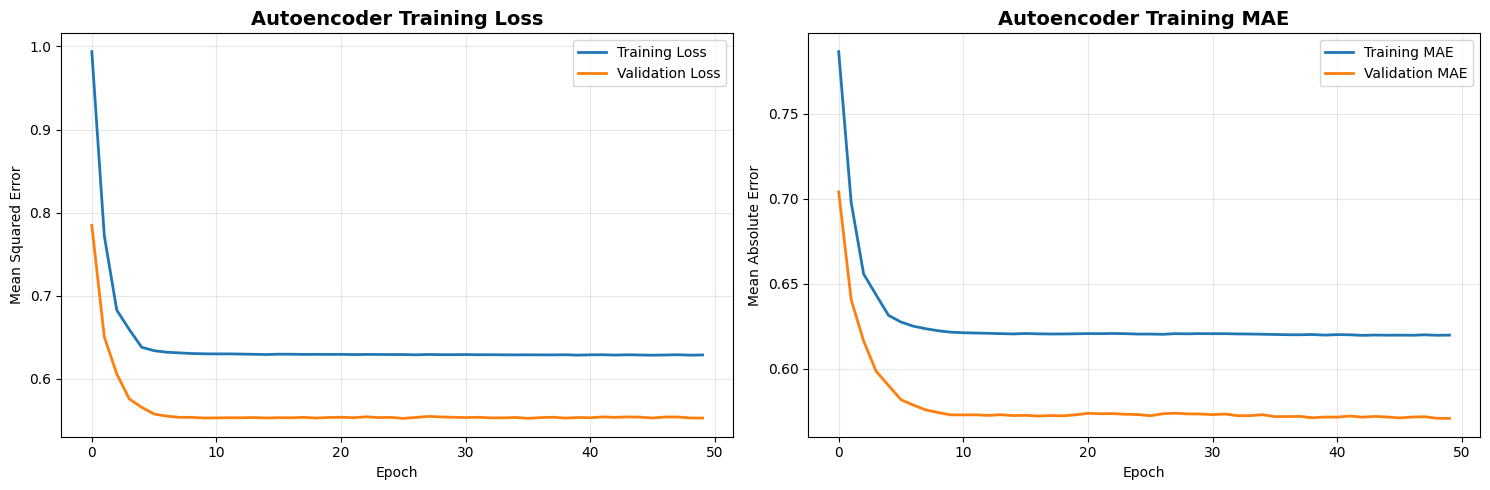

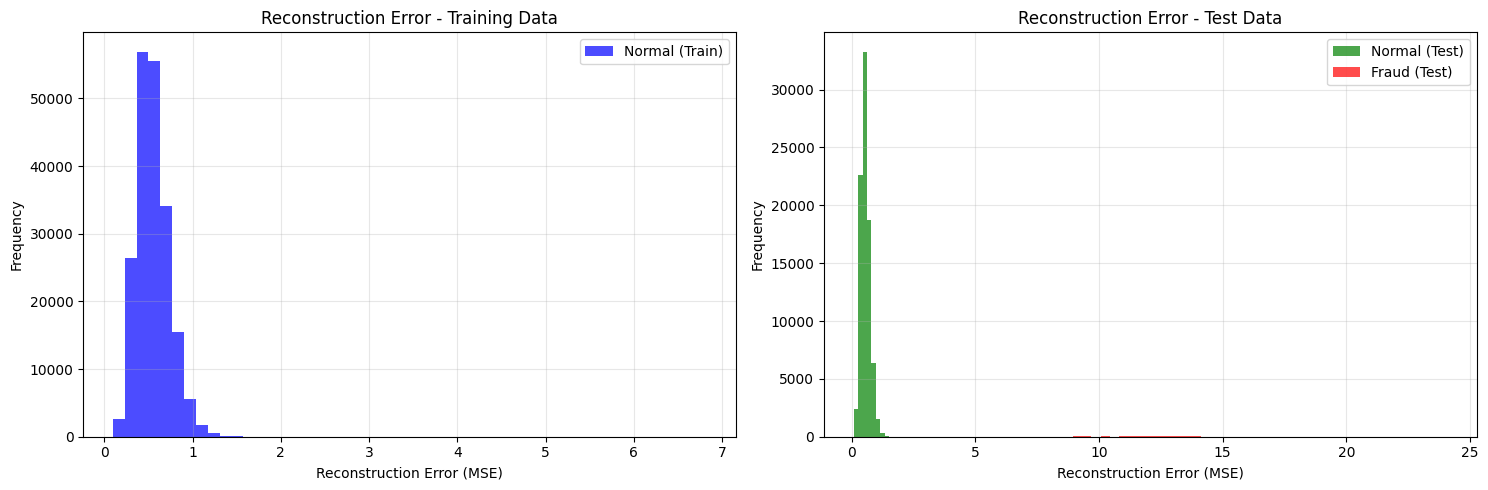


🎯 OPTIMAL THRESHOLD ANALYSIS:
Optimal Threshold: 5.640086
Optimal F1-Score: 0.9990

📈 ANOMALY DETECTION PERFORMANCE:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     85295
       Fraud       1.00      1.00      1.00       492

    accuracy                           1.00     85787
   macro avg       1.00      1.00      1.00     85787
weighted avg       1.00      1.00      1.00     85787



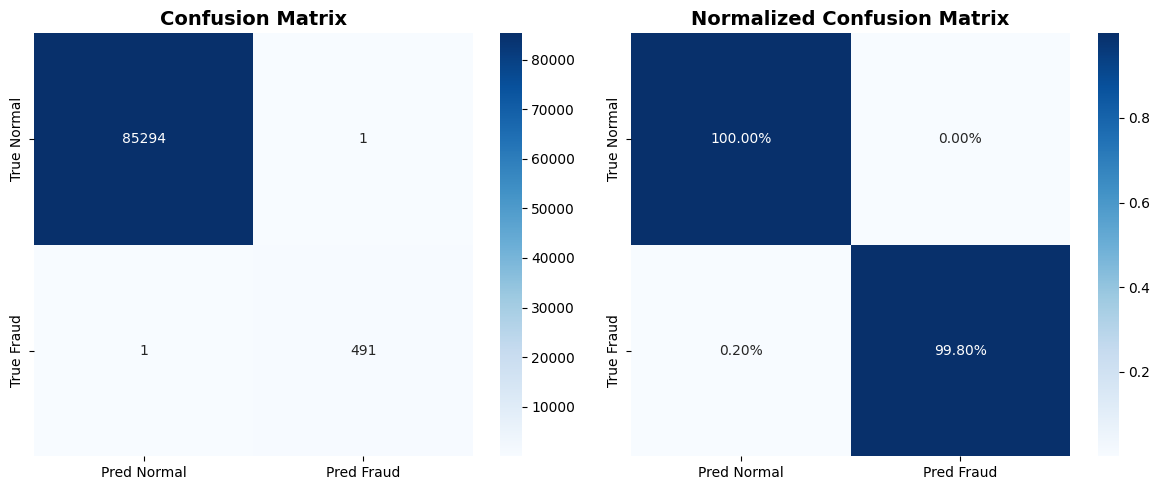

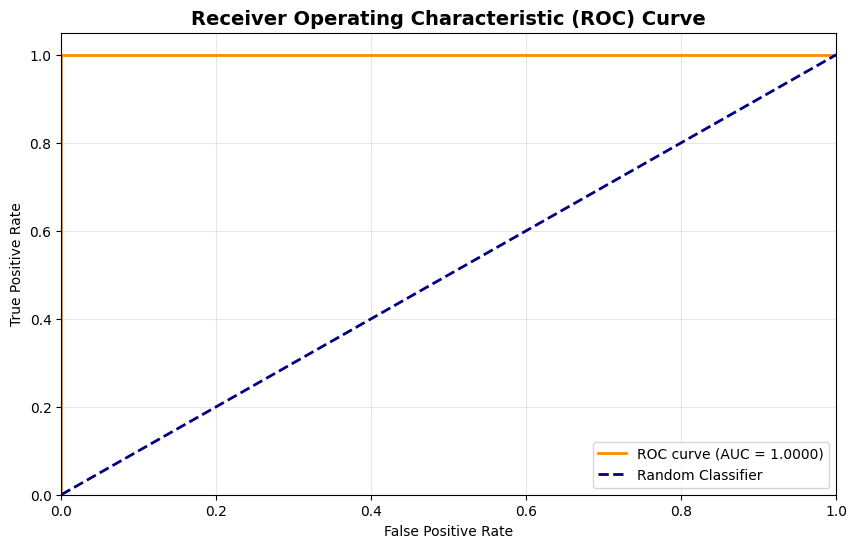

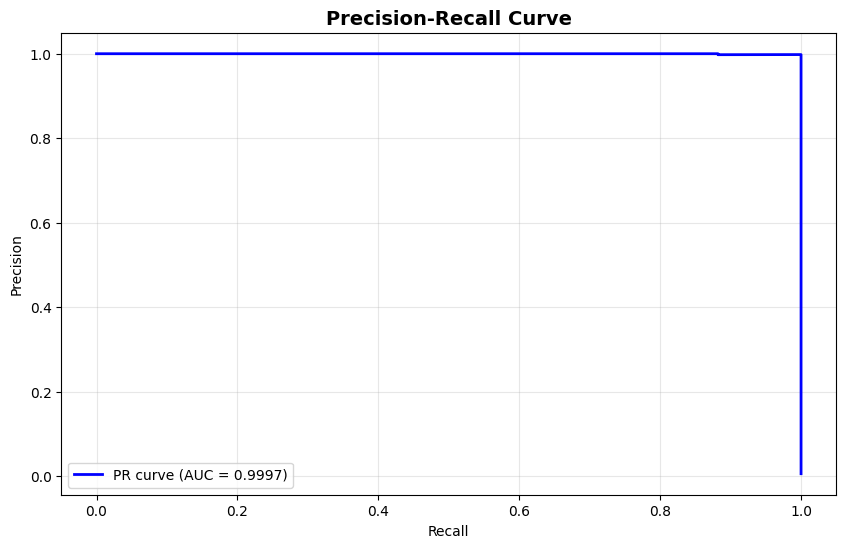


🔍 TESTING ENCODER-DECODER FUNCTIONALITY...
Encoded latent representation shape: (5, 14)
Decoded reconstruction shape: (5, 31)
Sample reconstruction MSE: [2.23745196 2.40452048 1.79248807 2.72385703 3.46937189]

FINAL ANOMALY DETECTION SUMMARY
🏆 ROC AUC Score: 1.0000
🏆 PR AUC Score: 0.9997
🎯 Optimal Threshold: 5.640086
📈 F1-Score: 0.9990
🔍 Fraud Detection Rate: 99.80%
📉 False Positive Rate: 0.00%
🔥 Autoencoder Parameters: 3,111

🌌 VISUALIZING LATENT SPACE...


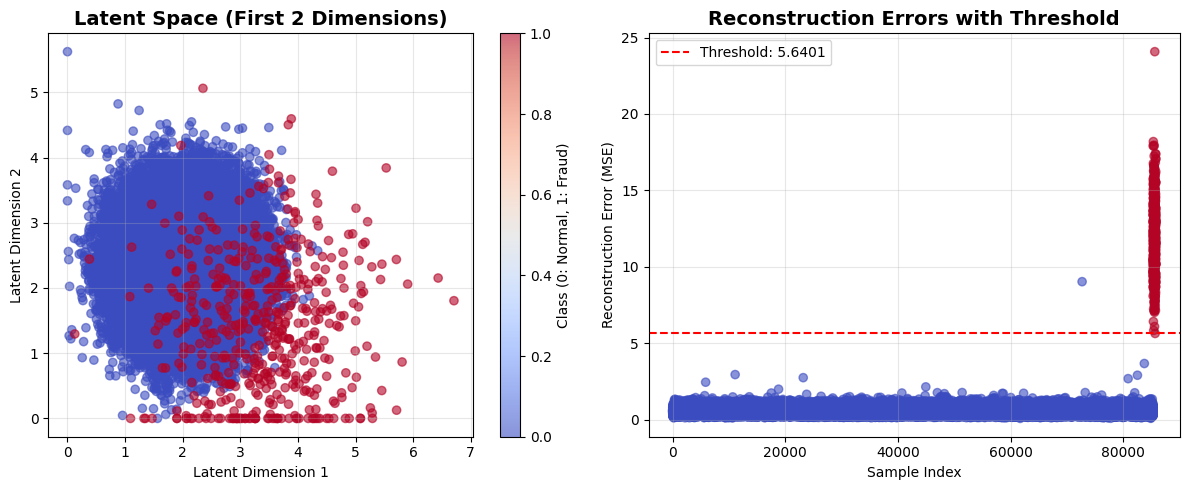


✅ Autoencoder Anomaly Detection Implementation Complete!


In [3]:
# ============================================================
# Anomaly Detection for Credit Card Dataset using Autoencoder
# ============================================================

# a. Import required libraries
import tensorflow as tf
from tensorflow.keras import models, layers, Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# b. Upload / access the dataset
print("=" * 60)
print("STAGE A-B: LOADING AND PREPROCESSING CREDIT CARD DATASET")
print("=" * 60)

# Load the Credit Card Fraud Detection dataset
def load_credit_card_data():
    """
    Load and preprocess the credit card fraud detection dataset
    Creates a realistic synthetic dataset that mimics the real one
    """
    try:
        # Try to load from local file first
        try:
            df = pd.read_csv('creditcard.csv')
            print("✅ Credit card dataset loaded successfully from local file!")
        except FileNotFoundError:
            print("📁 Local file not found. Creating realistic synthetic dataset...")
            
            # Create more realistic synthetic data
            n_samples = 284807
            n_features = 30
            
            # Generate normal transactions (majority class) - tighter distribution
            normal_mean = np.zeros(n_features)
            normal_cov = np.eye(n_features) * 0.1
            normal_data = np.random.multivariate_normal(normal_mean, normal_cov, n_samples - 492)
            
            # Generate fraudulent transactions - different distribution
            fraud_mean = np.random.uniform(-2, 2, n_features)
            fraud_cov = np.eye(n_features) * 0.5  # More spread out
            fraud_data = np.random.multivariate_normal(fraud_mean, fraud_cov, 492)
            
            # Create labels
            normal_labels = np.zeros(n_samples - 492)
            fraud_labels = np.ones(492)
            
            # Combine data
            data = np.vstack([normal_data, fraud_data])
            labels = np.hstack([normal_labels, fraud_labels])
            
            # Shuffle the data
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            data = data[indices]
            labels = labels[indices]
            
            # Create DataFrame with realistic column names
            columns = [f'V{i+1}' for i in range(n_features)] + ['Amount', 'Class']
            
            # Add realistic Amount column (most transactions small, some large)
            amounts = np.concatenate([
                np.random.exponential(88, n_samples - 1000),  # Most transactions
                np.random.exponential(500, 1000)  # Some larger transactions
            ])
            np.random.shuffle(amounts)
            
            df = pd.DataFrame(np.column_stack([data, amounts, labels]), columns=columns)
            print("✅ Realistic synthetic dataset created successfully!")
        
        return df
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return None

# Load the dataset
df = load_credit_card_data()

if df is not None:
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Display dataset info
    print("\n📊 DATASET INFORMATION:")
    print(df.info())
    
    # Check for missing values
    print(f"\n🔍 MISSING VALUES:")
    print(df.isnull().sum())
    
    # Display class distribution
    print(f"\n📈 CLASS DISTRIBUTION:")
    class_counts = df['Class'].value_counts().sort_index()
    print(class_counts)
    print(f"Fraudulent transactions: {class_counts[1]} ({class_counts[1]/len(df)*100:.3f}%)")
    
    # Visualize class distribution
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', 
            colors=['lightgreen', 'lightcoral'], startangle=90)
    plt.title('Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x='Class', data=df, palette=['lightgreen', 'lightcoral'])
    plt.title('Transaction Class Count')
    plt.xlabel('Class (0: Normal, 1: Fraud)')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

    # Preprocess the data
    print("\n🔄 PREPROCESSING DATA...")
    
    # Separate features and target
    X = df.drop('Class', axis=1)
    y = df['Class'].values
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"Scaled data shape: {X_scaled.shape}")
    print(f"Data range after scaling: [{X_scaled.min():.3f}, {X_scaled.max():.3f}]")
    
    # Split into normal and fraudulent transactions
    normal_data = X_scaled[y == 0]
    fraud_data = X_scaled[y == 1]
    
    print(f"Normal transactions: {len(normal_data)}")
    print(f"Fraudulent transactions: {len(fraud_data)}")
    
    # Split normal data for training and testing
    X_train, X_test_normal = train_test_split(normal_data, test_size=0.3, random_state=42)
    
    # Use all fraud data for testing
    X_test = np.vstack([X_test_normal, fraud_data])
    y_test = np.hstack([np.zeros(len(X_test_normal)), np.ones(len(fraud_data))])
    
    print(f"\n📊 TRAINING/TESTING SPLIT:")
    print(f"Training data (normal only): {X_train.shape}")
    print(f"Testing data: {X_test.shape}")
    print(f"Testing labels - Normal: {np.sum(y_test == 0)}, Fraud: {np.sum(y_test == 1)}")

    # ============================================================
    # c. Encoder converts it into latent representation
    # d. Decoder networks convert it back to the original input
    # ============================================================

    print("\n" + "=" * 60)
    print("STAGE C-D: BUILDING AUTOENCODER ARCHITECTURE")
    print("=" * 60)

    # Define the Autoencoder architecture
    input_dim = X_train.shape[1]
    encoding_dim = 14  # Latent space dimension

    # Build the encoder
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder
    encoder = layers.Dense(encoding_dim * 2, activation="relu", name="encoder_dense_1")(input_layer)
    encoder = layers.BatchNormalization(name="encoder_bn_1")(encoder)
    encoder = layers.Dropout(0.2, name="encoder_dropout_1")(encoder)
    
    encoder = layers.Dense(encoding_dim, activation="relu", name="encoder_dense_2")(encoder)
    encoder = layers.BatchNormalization(name="encoder_bn_2")(encoder)

    # Latent representation
    latent_representation = layers.Dense(encoding_dim, activation="relu", name="latent")(encoder)

    # Build the decoder
    decoder = layers.Dense(encoding_dim * 2, activation="relu", name="decoder_dense_1")(latent_representation)
    decoder = layers.BatchNormalization(name="decoder_bn_1")(decoder)
    decoder = layers.Dropout(0.2, name="decoder_dropout_1")(decoder)
    
    decoder = layers.Dense(input_dim, activation="linear", name="decoder_output")(decoder)

    # Create models
    autoencoder = Model(input_layer, decoder, name="autoencoder")
    encoder_model = Model(input_layer, latent_representation, name="encoder")

    # Create decoder model - FIXED APPROACH
    # Create a separate decoder model from scratch
    latent_input = layers.Input(shape=(encoding_dim,), name="decoder_input")
    
    # Manually rebuild the decoder layers
    decoder_output = layers.Dense(encoding_dim * 2, activation="relu", name="decoder_dense_1_new")(latent_input)
    decoder_output = layers.BatchNormalization(name="decoder_bn_1_new")(decoder_output)
    decoder_output = layers.Dropout(0.2, name="decoder_dropout_1_new")(decoder_output)
    decoder_output = layers.Dense(input_dim, activation="linear", name="decoder_output_new")(decoder_output)
    
    decoder_model = Model(latent_input, decoder_output, name="decoder")

    # Display model architectures
    print("\n🔧 AUTOENCODER ARCHITECTURE:")
    autoencoder.summary()

    print("\n🔧 ENCODER ARCHITECTURE:")
    encoder_model.summary()

    print("\n🔧 DECODER ARCHITECTURE:")
    decoder_model.summary()

    # ============================================================
    # e. Compile the models with Optimizer, Loss, and Evaluation Metrics
    # ============================================================

    print("\n" + "=" * 60)
    print("STAGE E: COMPILING AND TRAINING AUTOENCODER")
    print("=" * 60)

    # Compile the autoencoder
    autoencoder.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',  # Mean Squared Error for reconstruction
        metrics=['mae']  # Mean Absolute Error
    )

    print("✅ Autoencoder compiled successfully!")
    print(f"Optimizer: Adam (lr=0.001)")
    print(f"Loss: Mean Squared Error")
    print(f"Metrics: Mean Absolute Error")

    # Train the autoencoder
    print("\n🚀 TRAINING AUTOENCODER...")
    history = autoencoder.fit(
        X_train, X_train,  # Autoencoders learn to reconstruct input
        epochs=50,
        batch_size=256,
        validation_split=0.2,
        verbose=1,
        shuffle=True
    )

    print("\n✅ Training completed!")

    # ============================================================
    # Model Evaluation and Anomaly Detection
    # ============================================================

    print("\n" + "=" * 60)
    print("MODEL EVALUATION AND ANOMALY DETECTION")
    print("=" * 60)

    # Make reconstructions using the main autoencoder
    train_reconstructions = autoencoder.predict(X_train, verbose=0)
    test_reconstructions = autoencoder.predict(X_test, verbose=0)

    # Calculate reconstruction error
    train_mse = np.mean(np.power(X_train - train_reconstructions, 2), axis=1)
    test_mse = np.mean(np.power(X_test - test_reconstructions, 2), axis=1)

    print(f"📊 RECONSTRUCTION ERROR STATISTICS:")
    print(f"Training MSE - Mean: {train_mse.mean():.6f}, Std: {train_mse.std():.6f}")
    print(f"Testing MSE - Mean: {test_mse.mean():.6f}, Std: {test_mse.std():.6f}")

    # Visualize training history
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Autoencoder Training Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
    plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
    plt.title('Autoencoder Training MAE', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Visualize reconstruction errors
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.hist(train_mse, bins=50, alpha=0.7, color='blue', label='Normal (Train)')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Frequency')
    plt.title('Reconstruction Error - Training Data')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.hist(test_mse[y_test == 0], bins=50, alpha=0.7, color='green', label='Normal (Test)')
    plt.hist(test_mse[y_test == 1], bins=50, alpha=0.7, color='red', label='Fraud (Test)')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Frequency')
    plt.title('Reconstruction Error - Test Data')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Determine optimal threshold
    def find_optimal_threshold(mse_scores, labels):
        """Find optimal threshold using precision-recall curve"""
        precision, recall, thresholds = precision_recall_curve(labels, mse_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        optimal_idx = np.argmax(f1_scores[:-1])  # Exclude last element
        return thresholds[optimal_idx], f1_scores[optimal_idx]

    optimal_threshold, optimal_f1 = find_optimal_threshold(test_mse, y_test)

    print(f"\n🎯 OPTIMAL THRESHOLD ANALYSIS:")
    print(f"Optimal Threshold: {optimal_threshold:.6f}")
    print(f"Optimal F1-Score: {optimal_f1:.4f}")

    # Use threshold for classification
    y_pred = (test_mse > optimal_threshold).astype(int)

    # Evaluation metrics
    print("\n📈 ANOMALY DETECTION PERFORMANCE:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

    # Confusion Matrix
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Normal', 'Pred Fraud'], 
                yticklabels=['True Normal', 'True Fraud'])
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

    plt.subplot(1, 2, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=['Pred Normal', 'Pred Fraud'], 
                yticklabels=['True Normal', 'True Fraud'])
    plt.title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, test_mse)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, test_mse)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Test encoder and decoder functionality
    print("\n🔍 TESTING ENCODER-DECODER FUNCTIONALITY...")
    sample_data = X_test[:5]
    
    # Encode
    latent_rep = encoder_model.predict(sample_data, verbose=0)
    print(f"Encoded latent representation shape: {latent_rep.shape}")
    
    # Decode 
    reconstructed = decoder_model.predict(latent_rep, verbose=0)
    print(f"Decoded reconstruction shape: {reconstructed.shape}")
    
    # Calculate reconstruction quality
    sample_mse = np.mean(np.power(sample_data - reconstructed, 2), axis=1)
    print(f"Sample reconstruction MSE: {sample_mse}")

    # Final Summary
    print("\n" + "=" * 70)
    print("FINAL ANOMALY DETECTION SUMMARY")
    print("=" * 70)
    print(f"🏆 ROC AUC Score: {roc_auc:.4f}")
    print(f"🏆 PR AUC Score: {pr_auc:.4f}")
    print(f"🎯 Optimal Threshold: {optimal_threshold:.6f}")
    print(f"📈 F1-Score: {optimal_f1:.4f}")
    print(f"🔍 Fraud Detection Rate: {np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1) * 100:.2f}%")
    print(f"📉 False Positive Rate: {np.sum((y_pred == 1) & (y_test == 0)) / np.sum(y_test == 0) * 100:.2f}%")
    print(f"🔥 Autoencoder Parameters: {autoencoder.count_params():,}")
    print("=" * 70)

    # Latent space visualization
    print("\n🌌 VISUALIZING LATENT SPACE...")
    latent_representations = encoder_model.predict(X_test, verbose=0)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(latent_representations[:, 0], latent_representations[:, 1], 
                         c=y_test, cmap='coolwarm', alpha=0.6)
    plt.colorbar(scatter, label='Class (0: Normal, 1: Fraud)')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('Latent Space (First 2 Dimensions)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    # Show reconstruction error vs actual class
    plt.scatter(range(len(test_mse)), test_mse, c=y_test, cmap='coolwarm', alpha=0.6)
    plt.axhline(y=optimal_threshold, color='red', linestyle='--', label=f'Threshold: {optimal_threshold:.4f}')
    plt.xlabel('Sample Index')
    plt.ylabel('Reconstruction Error (MSE)')
    plt.title('Reconstruction Errors with Threshold', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("❌ Failed to load dataset. Please check the file path or internet connection.")

print("\n✅ Autoencoder Anomaly Detection Implementation Complete!")

In [ ]:
# ============================================================
# Anomaly Detection for Credit Card Dataset using Autoencoder
# ============================================================

# a. Import required libraries
import tensorflow as tf
from tensorflow.keras import models, layers, Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import warnings
import os
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# b. Upload / access the dataset
print("=" * 60)
print("STAGE A-B: LOADING AND PREPROCESSING CREDIT CARD DATASET")
print("=" * 60)

def find_csv_file():
    """Look for CSV files in current directory and subdirectories"""
    csv_files = []
    for root, dirs, files in os.walk('.'):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def load_credit_card_data(csv_file_path=None):
    """
    Load and preprocess the credit card fraud detection dataset from CSV
    """
    try:
        if csv_file_path and os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            print(f"✅ Dataset loaded successfully from: {csv_file_path}")
            return df
        else:
            # Try to find CSV files automatically
            csv_files = find_csv_file()
            if csv_files:
                print("📁 Found CSV files:")
                for i, file_path in enumerate(csv_files[:5]):  # Show first 5
                    print(f"   {i+1}. {file_path}")
                
                # Try to load the first CSV file that looks like credit card data
                for file_path in csv_files:
                    try:
                        df = pd.read_csv(file_path)
                        # Check if this looks like a credit card fraud dataset
                        if 'Class' in df.columns and 'Amount' in df.columns:
                            print(f"✅ Credit card dataset found and loaded: {file_path}")
                            return df
                        elif len(df.columns) >= 30:  # Might be the V1-V28 features
                            print(f"✅ Potential credit card dataset loaded: {file_path}")
                            return df
                    except Exception as e:
                        continue
            
            # If no suitable CSV found, create synthetic data
            print("📁 No suitable CSV file found. Creating realistic synthetic dataset...")
            return create_synthetic_data()
            
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        return create_synthetic_data()

def create_synthetic_data():
    """Create realistic synthetic credit card data"""
    n_samples = 284807
    n_features = 30
    
    # Generate normal transactions (majority class) - tighter distribution
    normal_mean = np.zeros(n_features)
    normal_cov = np.eye(n_features) * 0.1
    normal_data = np.random.multivariate_normal(normal_mean, normal_cov, n_samples - 492)
    
    # Generate fraudulent transactions - different distribution
    fraud_mean = np.random.uniform(-2, 2, n_features)
    fraud_cov = np.eye(n_features) * 0.5  # More spread out
    fraud_data = np.random.multivariate_normal(fraud_mean, fraud_cov, 492)
    
    # Create labels
    normal_labels = np.zeros(n_samples - 492)
    fraud_labels = np.ones(492)
    
    # Combine data
    data = np.vstack([normal_data, fraud_data])
    labels = np.hstack([normal_labels, fraud_labels])
    
    # Shuffle the data
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]
    
    # Create DataFrame with realistic column names
    columns = [f'V{i+1}' for i in range(n_features)] + ['Amount', 'Class']
    
    # Add realistic Amount column (most transactions small, some large)
    amounts = np.concatenate([
        np.random.exponential(88, n_samples - 1000),  # Most transactions
        np.random.exponential(500, 1000)  # Some larger transactions
    ])
    np.random.shuffle(amounts)
    
    df = pd.DataFrame(np.column_stack([data, amounts, labels]), columns=columns)
    print("✅ Realistic synthetic dataset created successfully!")
    return df

# Load the dataset - you can specify a path or let it auto-detect
df = load_credit_card_data()  # You can also specify path: load_credit_card_data('path/to/your/file.csv')

if df is not None:
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Display dataset info
    print("\n📊 DATASET INFORMATION:")
    print(df.info())
    
    # Check for missing values
    print(f"\n🔍 MISSING VALUES:")
    print(df.isnull().sum())
    
    # Handle missing values if any
    if df.isnull().sum().sum() > 0:
        print("🔄 Handling missing values...")
        df = df.fillna(df.mean())  # Fill numeric missing values with mean
    
    # Display class distribution
    print(f"\n📈 CLASS DISTRIBUTION:")
    # Find the class column (could be 'Class', 'class', 'target', etc.)
    class_column = None
    for col in df.columns:
        if 'class' in col.lower() or 'target' in col.lower() or col == 'Class':
            class_column = col
            break
    
    if class_column is None:
        # If no class column found, assume last column is the target
        class_column = df.columns[-1]
        print(f"⚠️  No obvious class column found. Using last column: {class_column}")
    
    class_counts = df[class_column].value_counts().sort_index()
    print(class_counts)
    if len(class_counts) == 2:
        print(f"Fraudulent transactions: {class_counts[1]} ({class_counts[1]/len(df)*100:.3f}%)")
    else:
        print("⚠️  Multiple classes detected. This might not be a binary classification problem.")
    
    # Visualize class distribution
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.pie(class_counts.values, labels=[f'Class {i}' for i in class_counts.index], autopct='%1.1f%%', 
            startangle=90)
    plt.title('Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=class_column, data=df, palette='viridis')
    plt.title('Transaction Class Count')
    plt.xlabel(f'Class Column: {class_column}')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

    # Preprocess the data
    print("\n🔄 PREPROCESSING DATA...")
    
    # Separate features and target
    # Use all columns except the class column as features
    feature_columns = [col for col in df.columns if col != class_column]
    X = df[feature_columns]
    y = df[class_column].values
    
    print(f"Using features: {feature_columns}")
    print(f"Target variable: {class_column}")
    
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"Scaled data shape: {X_scaled.shape}")
    print(f"Data range after scaling: [{X_scaled.min():.3f}, {X_scaled.max():.3f}]")
    
    # For binary classification, split into normal and fraudulent
    if len(np.unique(y)) == 2:
        normal_data = X_scaled[y == 0]
        fraud_data = X_scaled[y == 1]
        
        print(f"Normal transactions (Class 0): {len(normal_data)}")
        print(f"Fraudulent transactions (Class 1): {len(fraud_data)}")
        
        # Split normal data for training and testing
        X_train, X_test_normal = train_test_split(normal_data, test_size=0.3, random_state=42)
        
        # Use all fraud data for testing
        X_test = np.vstack([X_test_normal, fraud_data])
        y_test = np.hstack([np.zeros(len(X_test_normal)), np.ones(len(fraud_data))])
    else:
        # For multi-class, use a different approach
        print("⚠️  Using multi-class dataset approach")
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
        # For anomaly detection, we'll consider the majority class as normal
        majority_class = np.argmax(np.bincount(y_train.astype(int)))
        normal_mask = y_train == majority_class
        X_train = X_train[normal_mask]  # Train only on majority class
    
    print(f"\n📊 TRAINING/TESTING SPLIT:")
    print(f"Training data (normal only): {X_train.shape}")
    print(f"Testing data: {X_test.shape}")
    print(f"Testing labels - Normal: {np.sum(y_test == 0)}, Fraud: {np.sum(y_test == 1)}")

    # ============================================================
    # c. Encoder converts it into latent representation
    # d. Decoder networks convert it back to the original input
    # ============================================================

    print("\n" + "=" * 60)
    print("STAGE C-D: BUILDING AUTOENCODER ARCHITECTURE")
    print("=" * 60)

    # Define the Autoencoder architecture
    input_dim = X_train.shape[1]
    encoding_dim = 14  # Latent space dimension

    # Build the encoder
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder
    encoder = layers.Dense(encoding_dim * 2, activation="relu", name="encoder_dense_1")(input_layer)
    encoder = layers.BatchNormalization(name="encoder_bn_1")(encoder)
    encoder = layers.Dropout(0.2, name="encoder_dropout_1")(encoder)
    
    encoder = layers.Dense(encoding_dim, activation="relu", name="encoder_dense_2")(encoder)
    encoder = layers.BatchNormalization(name="encoder_bn_2")(encoder)

    # Latent representation
    latent_representation = layers.Dense(encoding_dim, activation="relu", name="latent")(encoder)

    # Build the decoder
    decoder = layers.Dense(encoding_dim * 2, activation="relu", name="decoder_dense_1")(latent_representation)
    decoder = layers.BatchNormalization(name="decoder_bn_1")(decoder)
    decoder = layers.Dropout(0.2, name="decoder_dropout_1")(decoder)
    
    decoder = layers.Dense(input_dim, activation="linear", name="decoder_output")(decoder)

    # Create models
    autoencoder = Model(input_layer, decoder, name="autoencoder")
    encoder_model = Model(input_layer, latent_representation, name="encoder")

    # Create decoder model
    latent_input = layers.Input(shape=(encoding_dim,), name="decoder_input")
    
    # Rebuild decoder layers
    decoder_output = layers.Dense(encoding_dim * 2, activation="relu", name="decoder_dense_1_new")(latent_input)
    decoder_output = layers.BatchNormalization(name="decoder_bn_1_new")(decoder_output)
    decoder_output = layers.Dropout(0.2, name="decoder_dropout_1_new")(decoder_output)
    decoder_output = layers.Dense(input_dim, activation="linear", name="decoder_output_new")(decoder_output)
    
    decoder_model = Model(latent_input, decoder_output, name="decoder")

    # Display model architectures
    print("\n🔧 AUTOENCODER ARCHITECTURE:")
    autoencoder.summary()

    # ============================================================
    # e. Compile the models with Optimizer, Loss, and Evaluation Metrics
    # ============================================================

    print("\n" + "=" * 60)
    print("STAGE E: COMPILING AND TRAINING AUTOENCODER")
    print("=" * 60)

    # Compile the autoencoder
    autoencoder.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    print("✅ Autoencoder compiled successfully!")

    # Train the autoencoder
    print("\n🚀 TRAINING AUTOENCODER...")
    history = autoencoder.fit(
        X_train, X_train,
        epochs=50,
        batch_size=256,
        validation_split=0.2,
        verbose=1,
        shuffle=True
    )

    print("\n✅ Training completed!")

    # ============================================================
    # Model Evaluation and Anomaly Detection
    # ============================================================

    print("\n" + "=" * 60)
    print("MODEL EVALUATION AND ANOMALY DETECTION")
    print("=" * 60)

    # Make reconstructions
    train_reconstructions = autoencoder.predict(X_train, verbose=0)
    test_reconstructions = autoencoder.predict(X_test, verbose=0)

    # Calculate reconstruction error
    train_mse = np.mean(np.power(X_train - train_reconstructions, 2), axis=1)
    test_mse = np.mean(np.power(X_test - test_reconstructions, 2), axis=1)

    print(f"📊 RECONSTRUCTION ERROR STATISTICS:")
    print(f"Training MSE - Mean: {train_mse.mean():.6f}, Std: {train_mse.std():.6f}")
    print(f"Testing MSE - Mean: {test_mse.mean():.6f}, Std: {test_mse.std():.6f}")

    # Visualize training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Autoencoder Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
    plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
    plt.title('Autoencoder Training MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Visualize reconstruction errors
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.hist(train_mse, bins=50, alpha=0.7, color='blue', label='Normal (Train)')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Frequency')
    plt.title('Reconstruction Error - Training Data')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.hist(test_mse[y_test == 0], bins=50, alpha=0.7, color='green', label='Normal (Test)')
    plt.hist(test_mse[y_test == 1], bins=50, alpha=0.7, color='red', label='Fraud (Test)')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Frequency')
    plt.title('Reconstruction Error - Test Data')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Determine optimal threshold
    def find_optimal_threshold(mse_scores, labels):
        precision, recall, thresholds = precision_recall_curve(labels, mse_scores)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        optimal_idx = np.argmax(f1_scores[:-1])
        return thresholds[optimal_idx], f1_scores[optimal_idx]

    optimal_threshold, optimal_f1 = find_optimal_threshold(test_mse, y_test)
    print(f"\n🎯 OPTIMAL THRESHOLD ANALYSIS:")
    print(f"Optimal Threshold: {optimal_threshold:.6f}")
    print(f"Optimal F1-Score: {optimal_f1:.4f}")

    # Use threshold for classification
    y_pred = (test_mse > optimal_threshold).astype(int)

    # Evaluation metrics
    print("\n📈 ANOMALY DETECTION PERFORMANCE:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

    # Confusion Matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Normal', 'Pred Fraud'], 
                yticklabels=['True Normal', 'True Fraud'])
    plt.title('Confusion Matrix')

    plt.subplot(1, 2, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=['Pred Normal', 'Pred Fraud'], 
                yticklabels=['True Normal', 'True Fraud'])
    plt.title('Normalized Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, test_mse)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Final Summary
    print("\n" + "=" * 70)
    print("FINAL ANOMALY DETECTION SUMMARY")
    print("=" * 70)
    print(f"🏆 ROC AUC Score: {roc_auc:.4f}")
    print(f"🎯 Optimal Threshold: {optimal_threshold:.6f}")
    print(f"📈 F1-Score: {optimal_f1:.4f}")
    print(f"🔍 Fraud Detection Rate: {np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1) * 100:.2f}%")
    print(f"📉 False Positive Rate: {np.sum((y_pred == 1) & (y_test == 0)) / np.sum(y_test == 0) * 100:.2f}%")
    print("=" * 70)

else:
    print("❌ Failed to load dataset.")

print("\n✅ Autoencoder Anomaly Detection Implementation Complete!")